# Import Packages

In [1]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


# Train on Small Data Set

## Import and aggregate data

In [2]:
# Import data
submission = pd.read_csv(f'{utils.get_m5_root_dir()}/data/input/sample_submission.csv')
df = pd.read_csv(f'{utils.get_m5_root_dir()}/data/preprocessed/tx2_hobbies_1year.csv')

In [3]:
# drop validation data since we don't need it here
df = df.loc[df['data_type']=='train']

In [4]:
# aggregate
df_aggregated = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
df_aggregated.reset_index(level=df_aggregated.index.names, inplace=True)

In [5]:
df_aggregated

,date,sale
0,2015-04-24,379.0
1,2015-04-25,477.0
2,2015-04-26,403.0
3,2015-04-27,313.0
4,2015-04-28,301.0
...,...,...
362,2016-04-20,373.0
363,2016-04-21,340.0
364,2016-04-22,388.0
365,2016-04-23,436.0


## Plot Series

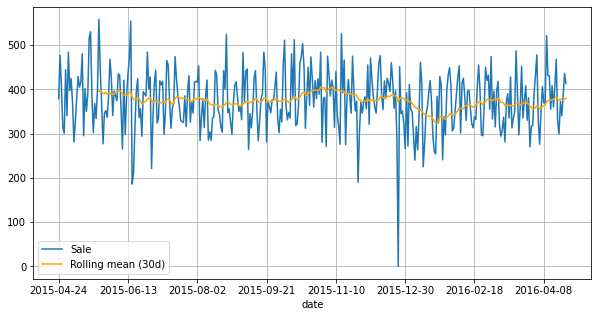

In [6]:
ax = df_aggregated.plot(x='date',
             y='sale',
             style='-',
             figsize=(10,5)
            )
roll_mean = df_aggregated['sale'].rolling(30).mean()
roll_mean.plot(ax=ax, color='orange', legend=False, grid=True)
ax.legend(['Sale', 'Rolling mean (30d)'])

## Compute Forecast on Store and Category Level

In [7]:
df_prophet = pd.DataFrame({
    'ds': df_aggregated['date'],
    'y': df_aggregated['sale']
})
df_prophet

,ds,y
0,2015-04-24,379.0
1,2015-04-25,477.0
2,2015-04-26,403.0
3,2015-04-27,313.0
4,2015-04-28,301.0
...,...,...
362,2016-04-20,373.0
363,2016-04-21,340.0
364,2016-04-22,388.0
365,2016-04-23,436.0


In [8]:
model = Prophet()
model.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [133]:
future = model.make_future_dataframe(periods=28, include_history=False)
future

,ds
0,2016-04-25
1,2016-04-26
2,2016-04-27
3,2016-04-28
4,2016-04-29
5,2016-04-30
6,2016-05-01
7,2016-05-02
8,2016-05-03
9,2016-05-04


In [137]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2016-04-25,367.612738,292.985286,440.956039
1,2016-04-26,315.023357,244.059898,387.441777
2,2016-04-27,341.492775,267.485368,414.559835
3,2016-04-28,343.186595,268.910239,413.354062
4,2016-04-29,365.462129,291.608451,436.404926
5,2016-04-30,407.775385,338.746911,481.214021
6,2016-05-01,415.948229,340.774906,489.195648
7,2016-05-02,367.273191,292.284457,436.789206
8,2016-05-03,314.683810,241.746180,382.826613
9,2016-05-04,341.153228,271.962285,414.851946


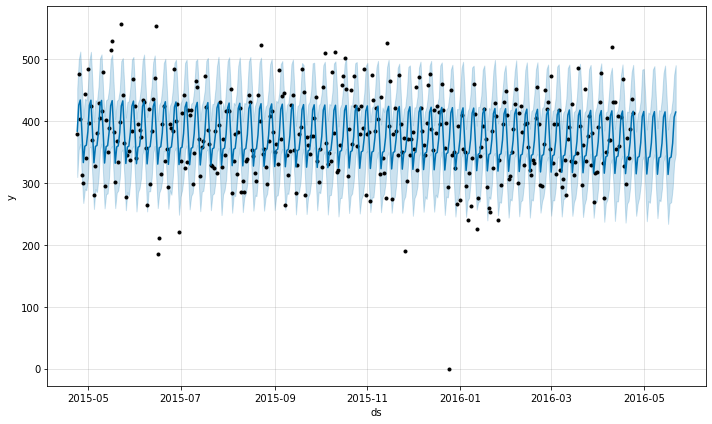

In [130]:
# visualize predictions (including history)
future_incl_hist = model.make_future_dataframe(periods=28, include_history=True)
predictions_incl_hist = model.predict(future_incl_hist)
fig = model.plot(predictions_incl_hist)

## Compute Distribution

In [14]:
df_bckp 

In [138]:
df = df_bckp[['id','date','sale']]
df['roll_mean_28'] = df['sale'].rolling(28).mean()
df = df.loc[df['date'] == df['date'].max()]
df = df.reset_index(drop=True)
df

c:\users\domin\anaconda3\envs\predicting-sales-data\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,date,sale,roll_mean_28
0,HOBBIES_1_001_TX_2_validation,2016-04-24,0.0,0.428571
1,HOBBIES_1_002_TX_2_validation,2016-04-24,1.0,0.464286
2,HOBBIES_1_003_TX_2_validation,2016-04-24,0.0,0.428571
3,HOBBIES_1_004_TX_2_validation,2016-04-24,3.0,0.535714
4,HOBBIES_1_005_TX_2_validation,2016-04-24,0.0,0.464286
...,...,...,...,...
560,HOBBIES_2_145_TX_2_validation,2016-04-24,0.0,0.178571
561,HOBBIES_2_146_TX_2_validation,2016-04-24,2.0,0.250000
562,HOBBIES_2_147_TX_2_validation,2016-04-24,0.0,0.250000
563,HOBBIES_2_148_TX_2_validation,2016-04-24,0.0,0.250000


In [139]:
roll_mean_sum = df['roll_mean_28'].sum()
roll_mean_sum

415.35714285714283

In [140]:
df['roll_mean_28'] / roll_mean_sum 

0      0.001032
1      0.001118
2      0.001032
3      0.001290
4      0.001118
         ...   
560    0.000430
561    0.000602
562    0.000602
563    0.000602
564    0.000602
Name: roll_mean_28, Length: 565, dtype: float64

In [147]:
forecast['yhat']

0     367.612738
1     315.023357
2     341.492775
3     343.186595
4     365.462129
5     407.775385
6     415.948229
7     367.273191
8     314.683810
9     341.153228
10    342.847048
11    365.122582
12    407.435838
13    415.608682
14    366.933644
15    314.344263
16    340.813681
17    342.507501
18    364.783035
19    407.096291
20    415.269136
21    366.594097
22    314.004717
23    340.474135
24    342.167954
25    364.443488
26    406.756744
27    414.929589
Name: yhat, dtype: float64

In [56]:
0.428571/415.35714285714283*384.003748

0.396220152016769

In [81]:

submission

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df

,id,date,sale,roll_mean_28
206790,HOBBIES_1_001_TX_2_validation,2016-04-24,0.0,0.428571
206791,HOBBIES_1_002_TX_2_validation,2016-04-24,1.0,0.464286
206792,HOBBIES_1_003_TX_2_validation,2016-04-24,0.0,0.428571
206793,HOBBIES_1_004_TX_2_validation,2016-04-24,3.0,0.535714
206794,HOBBIES_1_005_TX_2_validation,2016-04-24,0.0,0.464286
...,...,...,...,...
207350,HOBBIES_2_145_TX_2_validation,2016-04-24,0.0,0.178571
207351,HOBBIES_2_146_TX_2_validation,2016-04-24,2.0,0.250000
207352,HOBBIES_2_147_TX_2_validation,2016-04-24,0.0,0.250000
207353,HOBBIES_2_148_TX_2_validation,2016-04-24,0.0,0.250000


In [95]:
forecast['yhat'][0]

384.0037479994256

In [96]:
df

,id,date,sale,roll_mean_28
206790,HOBBIES_1_001_TX_2_validation,2016-04-24,0.0,0.428571
206791,HOBBIES_1_002_TX_2_validation,2016-04-24,1.0,0.464286
206792,HOBBIES_1_003_TX_2_validation,2016-04-24,0.0,0.428571
206793,HOBBIES_1_004_TX_2_validation,2016-04-24,3.0,0.535714
206794,HOBBIES_1_005_TX_2_validation,2016-04-24,0.0,0.464286
...,...,...,...,...
207350,HOBBIES_2_145_TX_2_validation,2016-04-24,0.0,0.178571
207351,HOBBIES_2_146_TX_2_validation,2016-04-24,2.0,0.250000
207352,HOBBIES_2_147_TX_2_validation,2016-04-24,0.0,0.250000
207353,HOBBIES_2_148_TX_2_validation,2016-04-24,0.0,0.250000


In [148]:
for i,row in forecast.iterrows():        
    df[f'F{i+1}'] = df['roll_mean_28'] / roll_mean_sum * row['yhat']


In [149]:
df

,id,date,sale,roll_mean_28,F1,F2,F3,F4,F5,F6,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_TX_2_validation,2016-04-24,0.0,0.428571,0.379308,0.325046,0.352357,0.354105,0.377089,0.420748,...,0.376388,0.420048,0.428481,0.378257,0.323995,0.351306,0.353054,0.376038,0.419697,0.428130
1,HOBBIES_1_002_TX_2_validation,2016-04-24,1.0,0.464286,0.410917,0.352133,0.381720,0.383614,0.408513,0.455811,...,0.407754,0.455052,0.464187,0.409778,0.350994,0.380582,0.382475,0.407374,0.454672,0.463808
2,HOBBIES_1_003_TX_2_validation,2016-04-24,0.0,0.428571,0.379308,0.325046,0.352357,0.354105,0.377089,0.420748,...,0.376388,0.420048,0.428481,0.378257,0.323995,0.351306,0.353054,0.376038,0.419697,0.428130
3,HOBBIES_1_004_TX_2_validation,2016-04-24,3.0,0.535714,0.474135,0.406307,0.440446,0.442631,0.471361,0.525936,...,0.470485,0.525060,0.535601,0.472821,0.404993,0.439133,0.441317,0.470047,0.524622,0.535163
4,HOBBIES_1_005_TX_2_validation,2016-04-24,0.0,0.464286,0.410917,0.352133,0.381720,0.383614,0.408513,0.455811,...,0.407754,0.455052,0.464187,0.409778,0.350994,0.380582,0.382475,0.407374,0.454672,0.463808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,HOBBIES_2_145_TX_2_validation,2016-04-24,0.0,0.178571,0.158045,0.135436,0.146815,0.147544,0.157120,0.175312,...,0.156828,0.175020,0.178534,0.157607,0.134998,0.146378,0.147106,0.156682,0.174874,0.178388
561,HOBBIES_2_146_TX_2_validation,2016-04-24,2.0,0.250000,0.221263,0.189610,0.205542,0.206561,0.219969,0.245437,...,0.219560,0.245028,0.249947,0.220650,0.188997,0.204929,0.205948,0.219355,0.244823,0.249743
562,HOBBIES_2_147_TX_2_validation,2016-04-24,0.0,0.250000,0.221263,0.189610,0.205542,0.206561,0.219969,0.245437,...,0.219560,0.245028,0.249947,0.220650,0.188997,0.204929,0.205948,0.219355,0.244823,0.249743
563,HOBBIES_2_148_TX_2_validation,2016-04-24,0.0,0.250000,0.221263,0.189610,0.205542,0.206561,0.219969,0.245437,...,0.219560,0.245028,0.249947,0.220650,0.188997,0.204929,0.205948,0.219355,0.244823,0.249743
